In [1]:
%matplotlib notebook
import numpy as np
from scipy import optimize
from scipy.optimize import curve_fit, minimize
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution
from scipy import odr
import lmfit
from lmfit import *

In [2]:
T_arr = np.array([np.float64(200.0+i*0.01) for i in range(0, 7000, 1)])

In [89]:
J_data = np.array([15.55434377, 16.07360839, 16.42768082, 15.69786549, 16.66195459,
       17.55534842, 17.96855766, 18.0898698 , 15.96661568, 16.08033782,
       16.46263754, 17.06047119, 17.23514954, 17.48425712, 18.60167982,
       15.39962181, 16.27889072, 16.9260336 , 17.13203544, 11.05381303,
       10.9134704 , 11.56384984, 11.75153231, 11.74026919, 12.2584704 ,
       12.36762628, 11.84505882, 12.25510384, 11.9887454 , 12.11340577,
       12.41016227, 12.68435985, 12.7440628 , 13.03342376, 13.17609126,
       13.26245109, 13.38738983, 13.56229286, 13.44870632, 13.56820172,
       13.61595005, 13.75204845, 13.9127533 , 14.13672057, 11.26259113,
       11.01884977, 11.73677554, 11.68801851, 12.26432298, 12.84207106,
       12.95465616, 13.43775056, 13.71349054, 14.00432137, 11.49770791,
       11.61549004, 11.38202594, 11.77438677, 12.37287162, 12.25000635,
       12.60265495, 12.76368439, 12.96540252, 13.06818586, 13.23299611,
       13.3783979 , 13.65417654, 13.81954394, 13.89762709, 17.32428246,
       18.50785587, 18.55388303, 17.42975228, 17.92685671])

T_data = np.array([236.54, 234.68, 233.17, 232.52, 231.36, 230.85, 230.37, 229.92,
       238.02, 236.09, 233.24, 232.13, 231.17, 231.52, 230.47, 233.43,
       232.22, 231.58, 231.04, 237.91, 237.63, 237.53, 237.41, 237.33,
       237.32, 237.19, 237.36, 237.16, 237.22, 237.08, 236.95, 236.89,
       236.84, 236.75, 236.55, 236.48, 236.44, 236.55, 236.4 , 236.37,
       236.33, 236.26, 236.16, 236.11, 237.83, 237.63, 237.47, 237.29,
       237.11, 237.04, 236.77, 236.53, 236.46, 236.13, 237.55, 237.42,
       237.37, 237.24, 237.14, 237.05, 236.93, 236.75, 236.68, 236.71,
       236.6 , 236.5 , 236.35, 236.32, 236.26, 230.42, 228.19, 227.08,
       231.79, 229.16])

'''
J_err = np.array([ 0.79843985,  0.38375144,  0.50981447, 31.41551347,  0.39754625,
         0.35172837,  0.35147723,  0.36925163, 31.68135925,  0.21840889,
         0.19459648,  0.228344  ,  0.28467747,  0.16762124,  0.19311601,
         1.02204351,  0.19178449,  0.10799222,  0.12245647,  1.24388734,
         1.21879085,  1.12866515,  1.21879085,  1.24388734,  1.30206238,
         1.12866515,  1.12866515,  1.30206238,  1.66455153,  1.21879085,
         1.12866515,  1.33619819,  1.24388734,  1.20518352,  1.30432422,
         1.2942203 ,  1.31361144,  1.3042332 ,  1.64366766,  1.47590626,
         1.13117952,  1.12670728,  1.12722349,  1.19380215,  1.24388734,
         1.21879085,  1.12866515,  1.24388734,  1.30206238,  1.12866515,
         1.12866515,  1.30776773,  1.1324234 ,  1.12286248,  1.30206238,
         1.24388735,  1.24388734,  1.07667684,  1.24388734,  1.24388734,
         1.07133963,  1.20499643,  1.20499643,  1.07184989,  1.20395102,
         1.70518428,  1.0710717 ,  1.29307775,  1.06976153, 35.57551388,
         1.74712151, 38.34233044,  1.60398407,  2.32240528])

J_err_upp = np.array([0.28100431, 0.18529695, 0.22068895, 0.41079423, 0.18996388,
        0.17706143, 0.18223254, 0.18972871, 0.3372734 , 0.1028067 ,
        0.09274352, 0.11005454, 0.1307744 , 0.08029888, 0.10560925,
        0.25396693, 0.08766857, 0.05250298, 0.05921152, 0.43021172,
        0.42757457, 0.41690766, 0.42757457, 0.43021172, 0.43582232,
        0.41690766, 0.41690766, 0.43582232, 0.45871244, 0.42757457,
        0.41690766, 0.43881057, 0.43021172, 0.42608677, 0.43533463,
        0.43526634, 0.43569297, 0.4360188 , 0.45883402, 0.44978268,
        0.41723236, 0.41715559, 0.41706748, 0.42481013, 0.43021172,
        0.42757457, 0.41690766, 0.43021172, 0.43582232, 0.41690766,
        0.41690766, 0.43633679, 0.41684323, 0.41643287, 0.43582232,
        0.43021172, 0.43021172, 0.40981581, 0.43021172, 0.43021172,
        0.40904553, 0.42606603, 0.42606603, 0.40911952, 0.42520614,
        0.46032529, 0.40900665, 0.43542929, 0.40917523, 1.47686046,
        1.462398  , 1.51235342, 1.45879786, 1.46684131])

J_err_low = np.array([ 0.51743554,  0.19845449,  0.28912551, 31.00471924,  0.20758238,
         0.17466695,  0.16924469,  0.17952292, 31.34408585,  0.11560219,
         0.10185296,  0.11828946,  0.15390307,  0.08732236,  0.08750676,
         0.76807658,  0.10411592,  0.05548924,  0.06324495,  0.81367562,
         0.79121629,  0.71175749,  0.79121629,  0.81367562,  0.86624006,
         0.71175749,  0.71175749,  0.86624006,  1.20583909,  0.79121629,
         0.71175749,  0.89738763,  0.81367562,  0.77909674,  0.86898959,
         0.85895396,  0.87791847,  0.8682144 ,  1.18483364,  1.02612358,
         0.71394716,  0.70955169,  0.71015602,  0.76899202,  0.81367562,
         0.79121628,  0.71175749,  0.81367562,  0.86624006,  0.71175749,
         0.71175749,  0.87143094,  0.71558018,  0.70642961,  0.86624006,
         0.81367562,  0.81367562,  0.66686103,  0.81367562,  0.81367562,
         0.6622941 ,  0.7789304 ,  0.7789304 ,  0.66273037,  0.77874488,
         1.24485899,  0.66206505,  0.85764846,  0.6605863 , 34.09865342,
         0.28472351, 36.82997702,  0.1451862 ,  0.85556398])
'''
J_err = np.array([15.46785717, 15.73507722, 16.19549017, 15.88004906, 16.33755094,
       17.18451761, 17.60269656, 17.74525807, 16.06025446, 15.48773702,
       15.82080443, 16.48989394, 16.75564544, 16.77772635, 17.97008109,
       15.31795679, 15.62696327, 16.02901087, 16.28939782, 11.166266  ,
       11.02172083, 11.6549439 , 11.85978274, 11.85272216, 12.37981452,
       12.45872034, 11.93615288, 12.37644797, 12.14569623, 12.2216562 ,
       12.50125634, 12.81041231, 12.85651577, 13.13929654, 13.29706611,
       13.38282359, 13.50920252, 13.68394713, 13.60530505, 13.71096312,
       13.70757018, 13.84323278, 14.00389117, 14.24054925, 11.3750441 ,
       11.1271002 , 11.82786961, 11.80047148, 12.38566711, 12.93316513,
       13.04575023, 13.55990663, 13.80482068, 14.09447113, 11.61905204,
       11.727943  , 11.49447891, 11.85392955, 12.48532459, 12.36245931,
       12.6809359 , 12.86952399, 13.07124212, 13.14658809, 13.33790619,
       13.5378191 , 13.73239376, 13.94001816, 13.97589114, 18.51295108,
       19.67015305, 19.78096503, 18.58534791, 19.09936983])

J_err_upp = np.array([ 0.        ,  0.        ,  0.        , 15.22106809, 15.50737391,
       15.95642817, 15.60291776, 15.68494607, 16.10902382, 16.96496637,
       17.39344089, 17.53627494, 16.07240747,  0.        , 15.74405337,
       15.21473575, 15.44846969, 15.5470774 , 16.22822746, 16.48865861,
       16.49969409, 17.74921557, 15.00751264, 15.33626568, 15.74269308,
       16.00434331, 10.99017474, 10.84562958, 11.47885265, 11.68369148,
       11.6766309 , 12.20372327, 12.28262909, 11.76006163, 12.20035671,
       11.96960497, 12.04556494, 12.32516508, 12.63432106, 12.68042451,
       12.96320529, 13.12057393, 13.20682588, 13.33243846, 13.50785587,
       13.42975228, 13.53529412, 13.53147892, 13.66745295, 13.82801506,
       14.06445799, 11.19895284, 10.95100895, 11.65177835, 11.62438022,
       12.20957585, 12.75707387, 12.86965897, 13.38381537, 13.62838893,
       13.91855453, 11.44296078, 11.55185175, 11.31838765, 11.67783829,
       12.30923333, 12.18636805, 12.50484465, 12.69343273, 12.89515086,
       12.97049683, 13.161368  , 13.36172784, 13.5563025 , 13.76417613,
       13.80002936, 18.49415459, 19.66275783, 19.76042248, 18.58092498,
       19.08635983])

J_err_low = np.array([ 0.        ,  0.        ,  0.        , 15.10483188, 15.34577369,
       15.82215473, 15.55372827, 15.75024069, 15.9494398 , 16.78310838,
       17.18515462, 17.32727551, 15.96195353,  0.        , 15.77388342,
       15.1567438 , 15.46960414, 15.49063918, 16.14557374, 16.41767501,
       16.45241236, 17.57066205, 15.02614121, 15.31534905, 15.71275275,
       15.97178215, 10.68914474, 10.54459958, 11.17782265, 11.38266149,
       11.3756009 , 11.90269327, 11.98159909, 11.45903163, 11.89932671,
       11.66857497, 11.74453495, 12.02413508, 12.33329106, 12.37939452,
       12.66217529, 12.8207456 , 12.90551517, 13.03342376, 13.20682588,
       13.1271048 , 13.23299611, 13.23044892, 13.36548798, 13.52633928,
       13.76342799, 10.89792284, 10.64997895, 11.35074835, 11.32335022,
       11.90854585, 12.45604387, 12.56862897, 13.08278537, 13.3283796 ,
       13.61700034, 11.14193078, 11.25082175, 11.01735765, 11.3768083 ,
       12.00820333, 11.88533806, 12.20381465, 12.39240273, 12.59412086,
       12.66946683, 12.86167742, 13.06069784, 13.25527251, 13.462398  ,
       13.49831055, 17.13987909, 17.89762709, 18.4456042 , 16.59106461,
       17.56937391])


In [90]:
indices = np.array([ 0,  1,  2,  7, 13, 16,  0,  1, 12, 13])

J_err_upp = np.delete(J_err_upp, indices)
J_err_low = np.delete(J_err_low, indices)

In [37]:
def residuals(params, T, J, sigma_low, sigma_upp):
    a1 = params['a1']
    a2 = params['a2']
    a3 = params['a3']
    a4 = params['a4']
    a5 = params['a5']
    model = a1+a2*T+a3*T**2+a4*T**3+a5*T**4
    weight = np.ones_like(model)
    weight[model > J]= sigma_upp[model > J] # if the fit point is above the measure, use upper weight
    weight[model <= J]= sigma_low[model <= J] # else use lower weight
    return abs(J-model)/weight

In [38]:
def kappa(params, T, J):
    a1 = params['a1']
    a2 = params['a2']
    a3 = params['a3']
    a4 = params['a4']
    a5 = params['a5']
    model = a1+a2*T+a3*T**2+a4*T**3+a5*T**4
    return (J-model)

In [39]:
def residual(params, T, J, J_err):
    a1 = params['a1']
    a2 = params['a2']
    a3 = params['a3']
    a4 = params['a4']
    a5 = params['a5']
    model = a1+a2*T+a3*T**2+a4*T**3+a5*T**4
    return abs(J-model)/J_err

In [40]:
parameters = lmfit.Parameters()
parameters.add('a1', value=-3211, vary=True)
parameters.add('a2', value=-420.483, vary=True)
parameters.add('a3', value=-27.71, vary=True)
parameters.add('a4', value=-0.2, vary=True)
parameters.add('a5', value=-0.01, vary=True)

In [91]:
result = lmfit.minimize(residuals, parameters, args=(T_data, J_data, J_err_low, J_err_upp))
lmfit.report_fit(result.params)

[[Variables]]
    a1: -717418.981 +/- 1.94034986 (0.00%) (init = -3211)
    a2:  12731.6457 +/- 0.02060710 (0.00%) (init = -420.483)
    a3: -84.6973611 +/- 1.4459e-05 (0.00%) (init = -27.71)
    a4:  0.25034667 +/- 3.6821e-07 (0.00%) (init = -0.2)
    a5: -2.7741e-04 +/- 6.5752e-10 (0.00%) (init = -0.01)
[[Correlations]] (unreported correlations are < 0.100)
    C(a1, a5) = -0.981
    C(a2, a4) = -0.978
    C(a1, a4) =  0.617
    C(a1, a2) = -0.574
    C(a4, a5) = -0.546
    C(a2, a5) =  0.477
    C(a3, a5) =  0.231
    C(a3, a4) = -0.204
    C(a1, a3) = -0.162


In [92]:
result2 = lmfit.minimize(kappa, parameters2, args=(T_data, J_data))
lmfit.report_fit(result2.params)

[[Variables]]
    a1:  2240808.32 (init = -3020.684)
    a2: -38214.4341 (init = -425.921)
    a3:  244.299331 (init = -25.9779)
    a4: -0.69384482 (init = -0.868451)
    a5:  7.3867e-04 (init = -0.0166203)
    a6: -1.7174e-04 (init = -0.000171736)
    a7: -7.4695e-07 (init = -7.46953e-07)


In [93]:
result1 = lmfit.minimize(residual, parameters, args=(T_data, J_data, J_err))
lmfit.report_fit(result1.params)

[[Variables]]
    a1: -915697.261 +/- 2.38054087 (0.00%) (init = -3211)
    a2:  16112.0680 +/- 0.02100566 (0.00%) (init = -420.483)
    a3: -106.309706 +/- 2.7445e-05 (0.00%) (init = -27.71)
    a4:  0.31175885 +/- 4.8027e-07 (0.00%) (init = -0.2)
    a5: -3.4285e-04 +/- 8.0145e-10 (0.00%) (init = -0.01)
[[Correlations]] (unreported correlations are < 0.100)
    C(a1, a5) = -0.991
    C(a2, a4) = -0.983
    C(a3, a4) = -0.898
    C(a2, a3) =  0.805
    C(a4, a5) = -0.661
    C(a1, a4) =  0.659
    C(a3, a5) =  0.640
    C(a1, a2) = -0.638
    C(a2, a5) =  0.619
    C(a1, a3) = -0.599


<IPython.core.display.Javascript object>


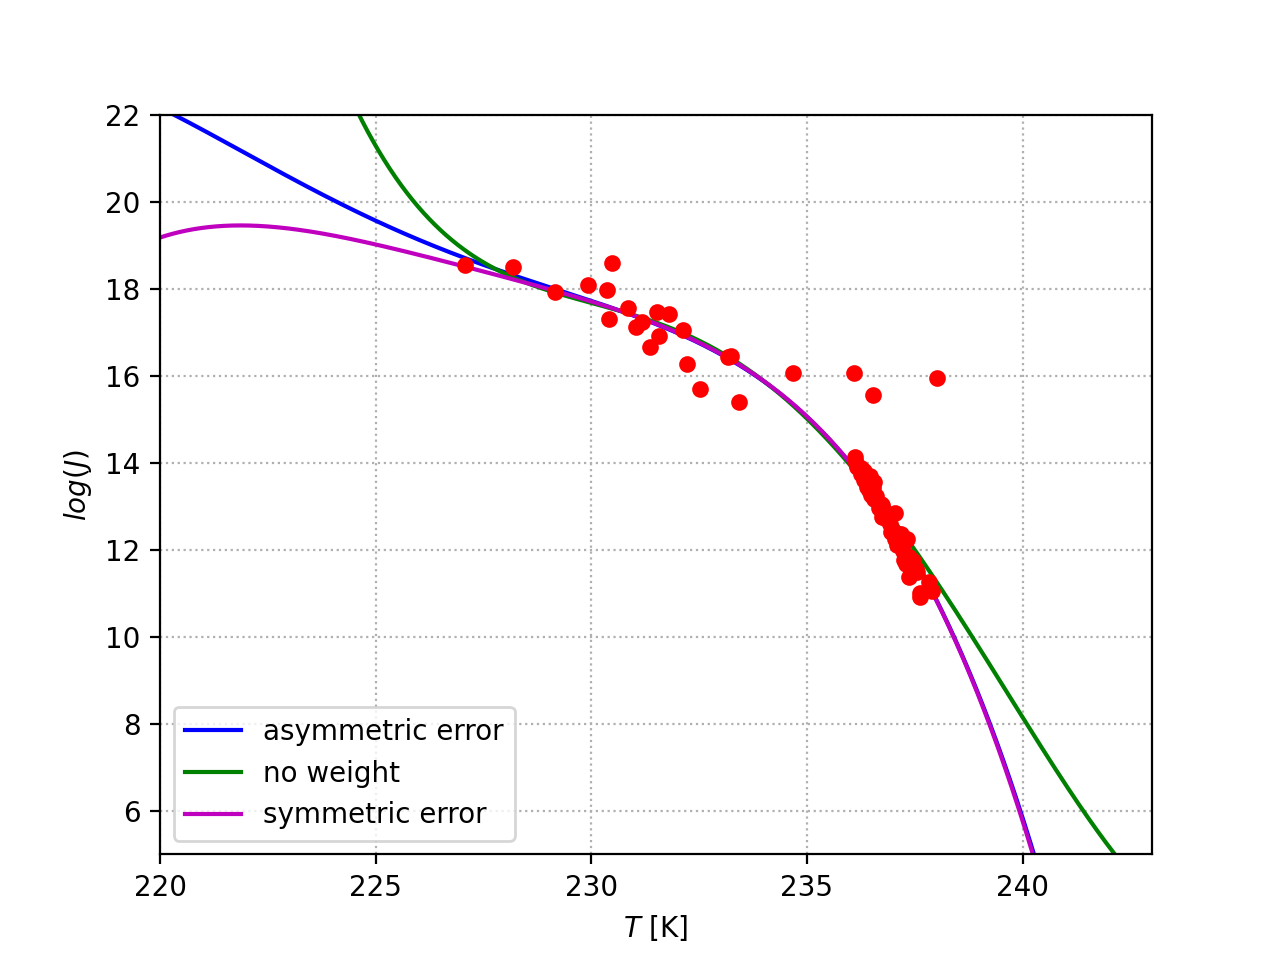

In [103]:
plt.figure()
#plt.errorbar(T_data, J_data, yerr = [J_err/2,J_err/2], color='r', ls='none', marker='o', ms =2)
plt.errorbar(T_data, J_data, color='r', ls='none', marker='o', ms =5)
J_fit = result.params['a1'].value+result.params['a2'].value*T_arr+result.params['a3'].value*T_arr**2+result.params['a4'].value*T_arr**3+result.params['a5'].value*T_arr**4
J_fit2 = result2.params['a1'].value+result2.params['a2'].value*T_arr+result2.params['a3'].value*T_arr**2+result2.params['a4'].value*T_arr**3+result2.params['a5'].value*T_arr**4
J_fit1 = result1.params['a1'].value+result1.params['a2'].value*T_arr+result1.params['a3'].value*T_arr**2+result1.params['a4'].value*T_arr**3+result1.params['a5'].value*T_arr**4

plt.plot(T_arr, J_fit, 'b-', label = 'asymmetric error')
plt.plot(T_arr, J_fit2, 'g-', label = 'no weight')
plt.plot(T_arr, J_fit1, 'm-', label = 'symmetric error' )
plt.xlabel('$T$ [K]')
plt.ylabel('$log(J)$')
plt.grid(linestyle='dotted')
plt.legend(loc='lower left', prop={'size': 10})
plt.xlim(220, 243)
#plt.ylim(0, 30)
plt.ylim(5, 22)
plt.show()

In [49]:
def residuals_6thorder(params, T, J, sigma_low, sigma_upp):
    a1 = params['a1']
    a2 = params['a2']
    a3 = params['a3']
    a4 = params['a4']
    a5 = params['a5']
    a6 = params['a6']
    a7 = params['a7']
    model = a1+a2*T+a3*T**2+a4*T**3+a5*T**4+a6*T**5+a7*T**6
    weight = np.ones_like(model)
    weight[model > J]= sigma_upp[model > J] # if the fit point is above the measure, use upper weight
    weight[model <= J]= sigma_low[model <= J] # else use lower weight
    return abs(J-model)/weight

In [50]:
def kappa_6thorder(params, T, J):
    a1 = params['a1']
    a2 = params['a2']
    a3 = params['a3']
    a4 = params['a4']
    a5 = params['a5']
    a6 = params['a6']
    a7 = params['a7']
    model = a1+a2*T+a3*T**2+a4*T**3+a5*T**4+a6*T**5+a7*T**6
    return (J-model)

In [51]:
def residual_6thorder(params, T, J, J_err):
    a1 = params['a1']
    a2 = params['a2']
    a3 = params['a3']
    a4 = params['a4']
    a5 = params['a5']
    a6 = params['a6']
    a7 = params['a7']
    model = a1+a2*T+a3*T**2+a4*T**3+a5*T**4+a6*T**5+a7*T**6
    return abs(J-model)/J_err

In [75]:
'''
parameters2 = lmfit.Parameters()
parameters2.add('a1', value=-3020.684, vary=True, min= -3028.684, max=-3000.00)
parameters2.add('a2', value=-425.921, vary=True, min= -427.921, max=-420.0)
parameters2.add('a3', value=-25.9779, vary=True, min=-29.9779, max=-20.0)
parameters2.add('a4', value=-0.868451, vary=True, min=-1.868451, max=-0.01)
parameters2.add('a5', value=-1.66203e-2, vary=True, min=-1.66203e-1, max=-0.001)
parameters2.add('a6', value=-1.71736e-4, vary=True, min= -1.71736e-3, max=-1e-5)
parameters2.add('a7', value=-7.46953e-7, vary=True, min=-7.46953e-6, max=-1e-7)
'''
parameters2 = lmfit.Parameters()
parameters2.add('a1', value=-3020.684, vary=True)
parameters2.add('a2', value=-425.921, vary=True)
parameters2.add('a3', value=-25.9779, vary=True)
parameters2.add('a4', value=-0.868451, vary=True)
parameters2.add('a5', value=-1.66203e-2, vary=True)
parameters2.add('a6', value=-1.71736e-4, vary=True)
parameters2.add('a7', value=-7.46953e-7, vary=True)

In [95]:
result_6th_sym = lmfit.minimize(residual_6thorder, parameters2, args=(T_data, J_data, J_err))

[[Variables]]
    a1:  281806.457 +/- 892.566054 (0.32%) (init = -3020.684)
    a2: -3928.73412 +/- 7.64189426 (0.19%) (init = -425.921)
    a3: -23.3491586 +/- 0.01635643 (0.07%) (init = -25.9779)
    a4:  0.68628619 +/- 3.8624e-07 (0.00%) (init = -0.868451)
    a5: -0.00458477 +/- 1.7711e-10 (0.00%) (init = -0.0166203)
    a6:  1.3017e-05 +/- 7.0138e-12 (0.00%) (init = -0.000171736)
    a7: -1.3788e-08 +/- 6.7421e-15 (0.00%) (init = -7.46953e-07)
[[Correlations]] (unreported correlations are < 0.100)
    C(a1, a2) = -1.000
    C(a2, a3) = -1.000
    C(a1, a3) =  1.000
    C(a4, a6) = -0.993
    C(a5, a6) = -0.485
    C(a4, a5) =  0.381
    C(a4, a7) = -0.258
    C(a6, a7) =  0.222
    C(a3, a7) = -0.136
    C(a3, a4) =  0.133
    C(a2, a7) =  0.132
    C(a1, a7) = -0.129
    C(a2, a4) = -0.128
    C(a1, a4) =  0.124
    C(a3, a6) = -0.115
    C(a2, a6) =  0.111
    C(a1, a6) = -0.106


In [96]:
result_6th_asym = lmfit.minimize(residuals_6thorder, parameters2, args=(T_data, J_data, J_err_low, J_err_upp))
lmfit.report_fit(result_6th_asym.params)

[[Variables]]
    a1: -39366.6168 +/- 10.4700537 (0.03%) (init = -3020.684)
    a2: -428.416842 +/- 0.04424901 (0.01%) (init = -425.921)
    a3: -26.3697760 +/- 9.2286e-05 (0.00%) (init = -25.9779)
    a4:  0.60049256 +/- 1.4391e-07 (0.00%) (init = -0.868451)
    a5: -0.00427879 +/- 2.4777e-10 (0.00%) (init = -0.0166203)
    a6:  1.2954e-05 +/- 3.1311e-12 (0.00%) (init = -0.000171736)
    a7: -1.4439e-08 +/- 1.0014e-14 (0.00%) (init = -7.46953e-07)
[[Correlations]] (unreported correlations are < 0.100)
    C(a4, a6) = -0.948
    C(a1, a2) = -0.937
    C(a3, a7) = -0.896
    C(a5, a6) = -0.828
    C(a4, a5) =  0.621
    C(a1, a4) = -0.447
    C(a2, a4) =  0.419
    C(a1, a7) =  0.410
    C(a1, a6) =  0.384
    C(a2, a6) = -0.368
    C(a1, a3) = -0.244
    C(a4, a7) = -0.242
    C(a1, a5) = -0.231
    C(a2, a5) =  0.227
    C(a6, a7) =  0.150
    C(a2, a7) = -0.122
    C(a2, a3) = -0.105
    C(a3, a4) =  0.103


In [97]:
result_6th_kappa = lmfit.minimize(kappa_6thorder, parameters2, args=(T_data, J_data))
lmfit.report_fit(result_6th_kappa.params)

[[Variables]]
    a1:  23784.3052 +/- 146220.191 (614.78%) (init = -3020.684)
    a2: -3058.82054 +/- 3862.02842 (126.26%) (init = -425.921)
    a3:  0.45227877 +/- 1.89714979 (419.46%) (init = -25.9779)
    a4:  0.52303841 +/- 0.78018158 (149.16%) (init = -0.868451)
    a5: -0.00448756 +/- 0.00684689 (152.57%) (init = -0.0166203)
    a6:  1.4456e-05 +/- 2.2319e-05 (154.40%) (init = -0.000171736)
    a7: -1.6577e-08 +/- 2.5758e-08 (155.38%) (init = -7.46953e-07)
[[Correlations]] (unreported correlations are < 0.100)
    C(a6, a7) = -0.999
    C(a5, a6) = -0.998
    C(a5, a7) =  0.996
    C(a4, a5) = -0.996
    C(a4, a6) =  0.993
    C(a4, a7) = -0.991
    C(a2, a4) = -0.939
    C(a2, a5) =  0.925
    C(a2, a6) = -0.917
    C(a2, a7) =  0.912
    C(a1, a7) =  0.603
    C(a1, a6) = -0.593
    C(a1, a5) =  0.576
    C(a1, a3) = -0.561
    C(a1, a4) = -0.546
    C(a3, a7) = -0.490
    C(a3, a6) =  0.485
    C(a3, a5) = -0.475
    C(a3, a4) =  0.454
    C(a1, a2) =  0.298
    C(a2, a3) = -0

<IPython.core.display.Javascript object>


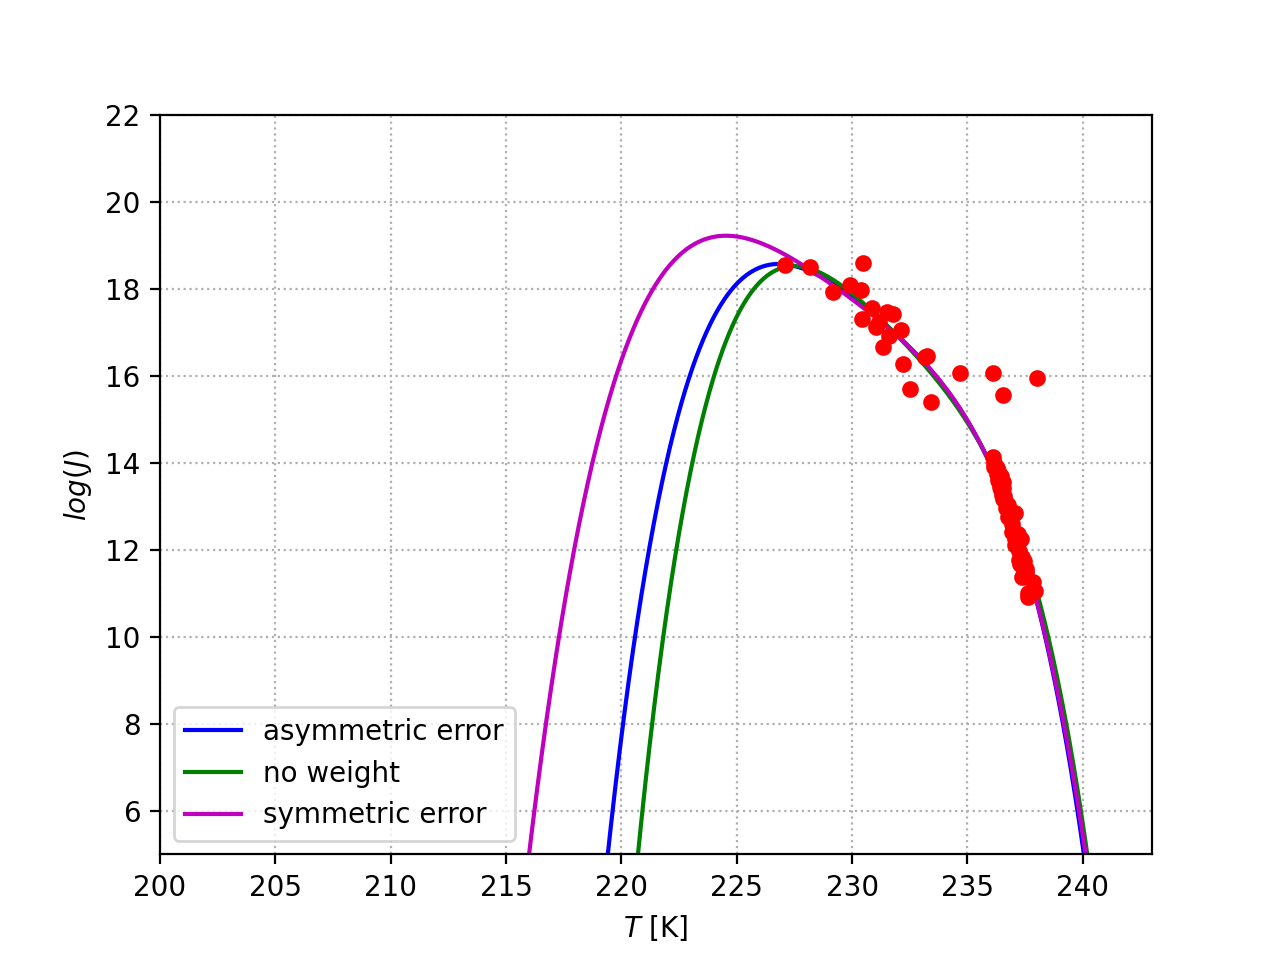

In [100]:
plt.figure()
#plt.errorbar(T_data, J_data, yerr = [J_err/2,J_err/2], color='r', ls='none', marker='o', ms =2)
plt.errorbar(T_data, J_data, color='r', ls='none', marker='o', ms =5)
J_fit = result_6th_asym.params['a1'].value+result_6th_asym.params['a2'].value*T_arr+result_6th_asym.params['a3'].value*T_arr**2+result_6th_asym.params['a4'].value*T_arr**3+result_6th_asym.params['a5'].value*T_arr**4+result_6th_asym.params['a6'].value*T_arr**5+result_6th_asym.params['a7'].value*T_arr**6
J_fit2 = result_6th_kappa.params['a1'].value+result_6th_kappa.params['a2'].value*T_arr+result_6th_kappa.params['a3'].value*T_arr**2+result_6th_kappa.params['a4'].value*T_arr**3+result_6th_kappa.params['a5'].value*T_arr**4+result_6th_kappa.params['a6'].value*T_arr**5+result_6th_kappa.params['a7'].value*T_arr**6
J_fit1 = result_6th_sym.params['a1'].value+result_6th_sym.params['a2'].value*T_arr+result_6th_sym.params['a3'].value*T_arr**2+result_6th_sym.params['a4'].value*T_arr**3+result_6th_sym.params['a5'].value*T_arr**4+result_6th_sym.params['a6'].value*T_arr**5+result_6th_sym.params['a7'].value*T_arr**6
plt.plot(T_arr, J_fit, 'b-', label = 'asymmetric error')
plt.plot(T_arr, J_fit2, 'g-', label = 'no weight')
plt.plot(T_arr, J_fit1, 'm-', label = 'symmetric error' )
plt.xlabel('$T$ [K]')
plt.ylabel('$log(J)$')
plt.grid(linestyle='dotted')
plt.legend(loc='lower left', prop={'size': 10})
plt.xlim(200, 243)
#plt.ylim(0, 30)
plt.ylim(5, 22)
plt.show()

In [ ]:
# symmetric 4th order, all 6th order 
# prepare table with the final data
# plots fits and experimental data and error bar
